### Perfume Recommendation System Using OpenAI API
In this notebook, I will attempt to build a chatbot that offers perfume recommendations based on user input based on OpenAI's API.

### Theory

**_What is prompt engineering?_**<br>
This is asking an AI questions in an effective manner to get desired results.

**_What is GPT3?_**<br>
A language model is a model that's trained to create patterns based upon user input and in turn generates intelligent text that is almost human coonverstaional based on the input pattern. Chatgpt3 is a language model owned by OpenAI that generates AI written text, it has more than 175 billion parameters(independent features). Given the model was released in 2022, training data is dated upto 2021 and sometimes one may need to update the data.

**_What are word embeddings?_**<br>
This is one of the methods for representing words as a numeric vector input that represents a word as alow dimensional vector.They allow for measurement of relatedness in words.

Embeddings unlike countvectorization or TF-IDF transformations allow for preservation of semantics. Semantic analysis involves studying the arrangement of words and phrases to determine their relationship in a given context.

The shorter the distance between vectors, the closer the relatedness. Some of the methods used to measure closeness includes: cosine similarity, euclidian distance among others.
Read more on that  [here](https://medium.com/@elabongaatuo/building-a-content-based-perfume-recommender-system-using-python-18da91b53f6b)
<br>
OpenAI API - grants user access to the technology that powers gpt3 without necessarily having to understand its inner workings.

Depending on the need you have for using OpenAI, there are four models that are offered: Ada, Babbage, Curie and Davinci. Their complexity, speed* and capability improves as you descend alphabetically. <br>
<br>
**_Davinci > Curie > Babbage > Ada_**

### Project Breakdown
1. Load dataset
2. Perform tokenization -(split paragraphs/sentences into smaller units that can be assigned meaning)
3. Choose preferred model according to need and get embeddings
4. Save embeddings to vector database that allows for indexing and eliminates need for constant generation
5. Create context for AI
6. Define function that instructs how the model should respond to queries


In [1]:
# installing necessary packages
import pandas as pd
import pickle 
'''
from openai.embeddings_utils import (
    get_embedding,
    distances_from_embeddings,
    indices_of_nearest_neighbors_from_distances,
)

# constants
EMBEDDING_MODEL = 'babbage'
'''

"\nfrom openai.embeddings_utils import (\n    get_embedding,\n    distances_from_embeddings,\n    indices_of_nearest_neighbors_from_distances,\n)\n\n# constants\nEMBEDDING_MODEL = 'babbage'\n"

In [2]:
# reading the perfume dataset
data = pd.read_csv("perfume.csv",index_col=[0])
data.head()

,base_notes,brand,gender,heart_notes,olfactory_family,perfume_name,top_notes
0,"amber,cedar,white musk",Lanvin,women,"jasmine,lily of the valley,peony",floral,Éclat D'Arpège Sheer,"lotus,tangerine–orange aroma,pitahaya"
1,"amber,cedar,musk",Lanvin,women,"peach,tea,osmanthus,peony,wisteria",floral,Éclat D'Arpège,"lemon,lilac"
2,"cedar,patchouli,sandalwood,vanilla",Davidoff,men,"jasmine,lily of the valley,rose,geranium",oriental,Zino,"bergamot,lavender,rosewood,sage"
3,"cedar,amber,frankincense,patchouli,musk",Shiseido,women,"violet,freesia,gardenia,hyacinth,red apple,lil...",floral,Zen,"pineapple,bergamot,orange,rose"
4,"patchouli,oak,vetiver",Yves Saint Laurent,women,rose,fruity,Yvresse,"nectarine,anise,mint"


In [3]:
#inspecting the dataset columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2127
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   base_notes        2128 non-null   object
 1   brand             2128 non-null   object
 2   gender            2128 non-null   object
 3   heart_notes       2128 non-null   object
 4   olfactory_family  2128 non-null   object
 5   perfume_name      2128 non-null   object
 6   top_notes         2128 non-null   object
dtypes: object(7)
memory usage: 133.0+ KB


In [4]:
# viewing olfactory family distribution
data.olfactory_family.value_counts()

floral       457
oriental     444
citrus       205
fruity       195
aromatic     187
woody        164
chypre       118
spicy         84
gourmand      68
aquatic       48
leather       39
green         28
smoky         28
powdery       23
synthetic     20
fresh         20
Name: olfactory_family, dtype: int64

In [5]:
# importing word tokenizer package
from transformers import GPT2TokenizerFast

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [6]:
# creating a metadata column for perfumes (data about data)
data['summary'] = "Perfume Name: " + data.perfume_name + ";Brand: " + data.brand +  ";Gender: " + data.gender + ";Top Notes: " + data.top_notes + ";Base Notes: " + data.base_notes + ";Heart Notes: " +  data.heart_notes + ";Olfactory Family: " + data.olfactory_family 

In [7]:
# tokenizing perfume metadata
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
data['n_tokens'] = data.summary.apply(lambda x: len(tokenizer.encode(x)))

In [8]:
# data inspection
data.head()

,base_notes,brand,gender,heart_notes,olfactory_family,perfume_name,top_notes,summary,n_tokens
0,"amber,cedar,white musk",Lanvin,women,"jasmine,lily of the valley,peony",floral,Éclat D'Arpège Sheer,"lotus,tangerine–orange aroma,pitahaya",Perfume Name: Éclat D'Arpège Sheer;Brand: Lanv...,77
1,"amber,cedar,musk",Lanvin,women,"peach,tea,osmanthus,peony,wisteria",floral,Éclat D'Arpège,"lemon,lilac",Perfume Name: Éclat D'Arpège;Brand: Lanvin;Gen...,69
2,"cedar,patchouli,sandalwood,vanilla",Davidoff,men,"jasmine,lily of the valley,rose,geranium",oriental,Zino,"bergamot,lavender,rosewood,sage",Perfume Name: Zino;Brand: Davidoff;Gender: men...,76
3,"cedar,amber,frankincense,patchouli,musk",Shiseido,women,"violet,freesia,gardenia,hyacinth,red apple,lil...",floral,Zen,"pineapple,bergamot,orange,rose",Perfume Name: Zen;Brand: Shiseido;Gender: wome...,85
4,"patchouli,oak,vetiver",Yves Saint Laurent,women,rose,fruity,Yvresse,"nectarine,anise,mint",Perfume Name: Yvresse;Brand: Yves Saint Lauren...,57


In [9]:
# adjusting display width and viewing perfume summary column
pd.set_option('display.max_colwidth', 500)
data['summary'].head()

0                                  Perfume Name: Éclat D'Arpège Sheer;Brand: Lanvin;Gender: women;Top Notes: lotus,tangerine–orange aroma,pitahaya;Base Notes: amber,cedar,white musk;Heart Notes: jasmine,lily of the valley,peony;Olfactory Family: floral
1                                                                      Perfume Name: Éclat D'Arpège;Brand: Lanvin;Gender: women;Top Notes: lemon,lilac;Base Notes: amber,cedar,musk;Heart Notes: peach,tea,osmanthus,peony,wisteria;Olfactory Family: floral
2                                  Perfume Name: Zino;Brand: Davidoff;Gender: men;Top Notes: bergamot,lavender,rosewood,sage;Base Notes: cedar,patchouli,sandalwood,vanilla;Heart Notes: jasmine,lily of the valley,rose,geranium;Olfactory Family: oriental
3    Perfume Name: Zen;Brand: Shiseido;Gender: women;Top Notes: pineapple,bergamot,orange,rose;Base Notes: cedar,amber,frankincense,patchouli,musk;Heart Notes: violet,freesia,gardenia,hyacinth,red apple,lily of the valley,lotus;Olfactory Fam

<AxesSubplot: >

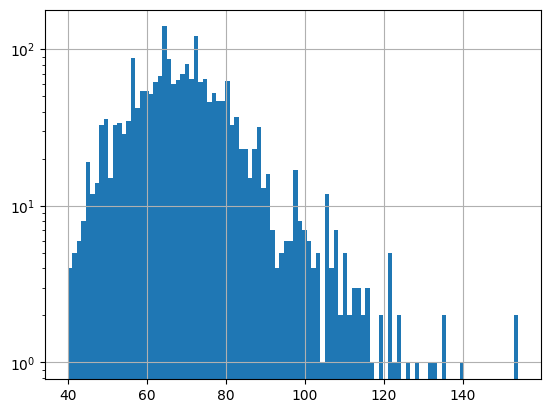

In [10]:
# visualizing token distribution
data.n_tokens.hist(bins=100, log=True)

In [11]:
# installing openai
import openai

In [12]:
# setting up user credentials for openai
openai.api_key = "your_api_key"

In [13]:
# getting embeddings and choosing model
embedding_model = 'babbage'

from openai.embeddings_utils import get_embedding

data['embeddings'] = data.summary.apply(lambda x: get_embedding(x, engine=f'text-search-{embedding_model}-doc-001'))
data.head()

,base_notes,brand,gender,heart_notes,olfactory_family,perfume_name,top_notes,summary,n_tokens,embeddings
0,"amber,cedar,white musk",Lanvin,women,"jasmine,lily of the valley,peony",floral,Éclat D'Arpège Sheer,"lotus,tangerine–orange aroma,pitahaya","Perfume Name: Éclat D'Arpège Sheer;Brand: Lanvin;Gender: women;Top Notes: lotus,tangerine–orange aroma,pitahaya;Base Notes: amber,cedar,white musk;Heart Notes: jasmine,lily of the valley,peony;Olfactory Family: floral",77,"[0.008845674805343151, 0.022967081516981125, -0.005501964595168829, 0.028577636927366257, 0.0010700777638703585, -0.005194288678467274, 0.013736812397837639, 0.010596711188554764, -0.026460105553269386, -0.01775469444692135, 0.04336416721343994, 0.011555935256183147, -0.002461405238136649, -0.005696523934602737, -0.014397410675883293, 0.029120594263076782, 0.03429678454995155, 0.0004917720216326416, 0.019166382029652596, 0.0685211792588234, 0.0721408873796463, 0.005221436731517315, -0.014650..."
1,"amber,cedar,musk",Lanvin,women,"peach,tea,osmanthus,peony,wisteria",floral,Éclat D'Arpège,"lemon,lilac","Perfume Name: Éclat D'Arpège;Brand: Lanvin;Gender: women;Top Notes: lemon,lilac;Base Notes: amber,cedar,musk;Heart Notes: peach,tea,osmanthus,peony,wisteria;Olfactory Family: floral",69,"[0.014537605457007885, 0.01854613609611988, 5.146369221620262e-05, 0.023267295211553574, -0.02055930905044079, -0.008244211785495281, 0.011455490253865719, 0.010618153028190136, -0.023641424253582954, -0.02102251723408699, 0.03254926949739456, 0.011829620227217674, 0.002547644078731537, -0.00831992831081152, -0.02985910139977932, 0.029663128778338432, 0.022198352962732315, 0.012372998520731926, 0.010190576314926147, 0.06869731098413467, 0.06670195609331131, -0.0020866631530225277, -0.0099589..."
2,"cedar,patchouli,sandalwood,vanilla",Davidoff,men,"jasmine,lily of the valley,rose,geranium",oriental,Zino,"bergamot,lavender,rosewood,sage","Perfume Name: Zino;Brand: Davidoff;Gender: men;Top Notes: bergamot,lavender,rosewood,sage;Base Notes: cedar,patchouli,sandalwood,vanilla;Heart Notes: jasmine,lily of the valley,rose,geranium;Olfactory Family: oriental",76,"[0.0069509828463196754, 0.029721442610025406, -0.013332138769328594, 0.02174386754631996, 0.02310059778392315, 0.00535004073753953, 0.007050476502627134, 0.005928912200033665, -0.02094792015850544, -0.03446095436811447, 0.01789979822933674, 0.008027322590351105, 0.023209135979413986, -0.006534918677061796, 0.0012165349908173084, 0.021834315732121468, 0.02324531599879265, -0.01116137020289898, 0.009840819053351879, 0.039037659764289856, 0.05817660689353943, 0.004117676988244057, -0.0229377914..."
3,"cedar,amber,frankincense,patchouli,musk",Shiseido,women,"violet,freesia,gardenia,hyacinth,red apple,lily of the valley,lotus",floral,Zen,"pineapple,bergamot,orange,rose","Perfume Name: Zen;Brand: Shiseido;Gender: women;Top Notes: pineapple,bergamot,orange,rose;Base Notes: cedar,amber,frankincense,patchouli,musk;Heart Notes: violet,freesia,gardenia,hyacinth,red apple,lily of the valley,lotus;Olfactory Family: floral",85,"[0.004411517176777124, 0.03955574333667755, -0.007019923534244299, 0.025036944076418877, 0.00749417906627059, -0.0074049630202353, 0.022463755682110786, 0.010865621268749237, -0.004939772188663483, -0.04256092756986618, 0.029450809583067894, 0.01747702620923519, 0.02907516248524189, 0.0005112335784360766, -0.014866272918879986, 0.020247431471943855, 0.009330159053206444, -0.0007466005627065897, 0.019777871668338776, 0.04458942636847496, 0.05101301148533821, 0.007029314991086721, -0.014180715..."
4,"patchouli,oak,vetiver",Yves Saint Laurent,women,rose,fruity,Yvresse,"nectarine,anise,mint","Perfume Name: Yvresse;Brand: Yves Saint Laurent;Gender: women;Top Notes: nectarine,anise,mint;Base Notes: patchouli,oak,vetiver;Heart Notes: rose;Olfactory Family: fruity",57,"[0.013442113995552063, 0.022421961650252342, -0.02039365842938423, 0.03267410770058632, -0.02433962933719158, -0.006854740437120199, 0.01654910482466221, 0.01044575

In [14]:
# converting data to parquet which allows for flat columnar data storage
data.to_parquet('marashi-babbage.parquet')

In [15]:
# reading the parquet file
data = pd.read_parquet('marashi-babbage.parquet')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2127
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   base_notes        2128 non-null   object
 1   brand             2128 non-null   object
 2   gender            2128 non-null   object
 3   heart_notes       2128 non-null   object
 4   olfactory_family  2128 non-null   object
 5   perfume_name      2128 non-null   object
 6   top_notes         2128 non-null   object
 7   summary           2128 non-null   object
 8   n_tokens          2128 non-null   int64 
 9   embeddings        2128 non-null   object
dtypes: int64(1), object(9)
memory usage: 182.9+ KB


In [16]:
# installing pinecone and setting up user credentials
import pinecone
pinecone.init(
    api_key='your_pinecone_key',  
    environment='your_pinecone_environment'
)

In [17]:
# reseting column display width
pd.reset_option("display.max_colwidth")

In [18]:
# creating an id column that will later allow for indexing
data['id'] = [str(i) for i in range(len(data))]
data.head()

,base_notes,brand,gender,heart_notes,olfactory_family,perfume_name,top_notes,summary,n_tokens,embeddings,id
0,"amber,cedar,white musk",Lanvin,women,"jasmine,lily of the valley,peony",floral,Éclat D'Arpège Sheer,"lotus,tangerine–orange aroma,pitahaya",Perfume Name: Éclat D'Arpège Sheer;Brand: Lanv...,77,"[0.008845674805343151, 0.022967081516981125, -...",0
1,"amber,cedar,musk",Lanvin,women,"peach,tea,osmanthus,peony,wisteria",floral,Éclat D'Arpège,"lemon,lilac",Perfume Name: Éclat D'Arpège;Brand: Lanvin;Gen...,69,"[0.014537605457007885, 0.01854613609611988, 5....",1
2,"cedar,patchouli,sandalwood,vanilla",Davidoff,men,"jasmine,lily of the valley,rose,geranium",oriental,Zino,"bergamot,lavender,rosewood,sage",Perfume Name: Zino;Brand: Davidoff;Gender: men...,76,"[0.0069509828463196754, 0.029721442610025406, ...",2
3,"cedar,amber,frankincense,patchouli,musk",Shiseido,women,"violet,freesia,gardenia,hyacinth,red apple,lil...",floral,Zen,"pineapple,bergamot,orange,rose",Perfume Name: Zen;Brand: Shiseido;Gender: wome...,85,"[0.004411517176777124, 0.03955574333667755, -0...",3
4,"patchouli,oak,vetiver",Yves Saint Laurent,women,rose,fruity,Yvresse,"nectarine,anise,mint",Perfume Name: Yvresse;Brand: Yves Saint Lauren...,57,"[0.013442113995552063, 0.022421961650252342, -...",4


In [19]:
# creating vector database/index and  choosing cosine similarity as method to measure distance
index_name = 'marashi-semantic-search'

if not index_name in pinecone.list_indexes():
    pinecone.create_index(
        index_name, dimension=len(data['embeddings'].tolist()[0]),
        metric='cosine'
    )

index = pinecone.Index(index_name)

In [20]:
# uploading and inserting data to the vector database
from tqdm.auto import tqdm

batch_size = 32

for i in tqdm(range(0, len(data), batch_size)):
    i_end = min(i+batch_size, len(data))
    data_slice = data.iloc[i:i_end]
    to_upsert = [
        (
            row['id'],
            row['embeddings'].tolist(),
            {   
                'perfume name': row['perfume_name'],
                'brand': row['brand'],
                'gender': row['gender'],
                'top notes': row['top_notes'],
                'base notes': row['base_notes'],
                'heart notes': row['heart_notes'],
                'olfactory family': row['olfactory_family'],
                'n_tokens': row['n_tokens']
            }
        ) for _, row in data_slice.iterrows()
    ]
    index.upsert(vectors=to_upsert)

  0%|          | 0/67 [00:00<?, ?it/s]

In [21]:
# creating json file that will allow for reverse mapping by index
mappings = {row['id']: row['summary'] for _, row in data[['id', 'summary']].iterrows()}

In [22]:
import json

with open('marashi-mapping.json', 'w') as fp:
    json.dump(mappings, fp)

In [23]:
with open('marashi-mapping.json', 'r') as fp:
    mappings = json.load(fp)

In [97]:
# creating a function that allows for reverse mapping
def load_index():
    pinecone.init(
        api_key='your_api_key',  
        environment='your_environment'
    )

    index_name = 'marashi-semantic-search'

    if not index_name in pinecone.list_indexes():
        raise KeyError(f"Index '{index_name}' does not exist.")

    return pinecone.Index(index_name)

In [94]:
index = load_index()

In [95]:
# creating context for the AI
def create_context( question,index, max_len=3750, size="babbage"):
    """
    Find most relevant context for a question via Pinecone search
    """
    
    q_embed = get_embedding(question, engine=f'text-search-{size}-query-001')
    res = index.query(q_embed, top_k=5, include_metadata=True)
    

    cur_len = 0
    contexts = []

    for row in res['matches']:
        text = mappings[row['id']]
        cur_len += row['metadata']['n_tokens'] + 4
        if cur_len < max_len:
            contexts.append(text)
        else:
            cur_len -= row['metadata']['n_tokens'] + 4
            if max_len - cur_len < 200:
                break
    return "\n\n###\n\n".join(contexts)

In [96]:
print(create_context("i need a perfume with vanilla and lavender top notes", index))

Perfume Name: Vanille Paradoxe;Brand: Les Parfums de Rosine;Gender: unisex;Top Notes: juniper,rosemary,grapefruit;Base Notes: vanilla,ambroxan,musk;Heart Notes: cedar,cardamom,angelica,rose;Olfactory Family: spicy

###

Perfume Name: Eau De Fleur De Lavande;Brand: Chloé;Gender: women;Top Notes: violet blossom,bergamot,citrusy notes,green notes;Base Notes: ambergris,cedar,vetiver,cashmeran,white musks;Heart Notes: lavender,iris,tea;Olfactory Family: floral

###

Perfume Name: Vanilla Affair;Brand: Essential Garden;Gender: women;Top Notes: musk;Base Notes: sandalwood;Heart Notes: vanilla,heliotrope;Olfactory Family: gourmand

###

Perfume Name: Flora Bella;Brand: Lalique;Gender: women;Top Notes: bergamot,mandarin orange,rose,violet;Base Notes: amber,spices,vanilla,white musk;Heart Notes: lilac,frangipani,freesia,cassia,mimosa,carnation,orchid,daphne,almond,tuberose,vanilla;Olfactory Family: floral

###

Perfume Name: Vanille Monoï - Eau De Parfum;Brand: Les Senteurs Gourmandes;Gender: wo

In [101]:
# prompting AI to answer questions based on context
def answer_question(
    index,
    fine_tuned_qa_model="text-davinci-003",
    question="recommend perfumes with marshmallow notes",
    instruction="Answer the query based on the context below, and if the query can't be answered based on the context, say \"My apologies, I don't quite know the answer to that\"\n\nContext:\n{0}\n\n---\n\nQuestion: {1}\nAnswer:",
    max_len=3550,
    size="babbage",
    debug=False,
    max_tokens=400,
    stop_sequence=None,
  
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        index,
        max_len=max_len,
        size=size,
    )
    if debug:
        print("Context:\n" + context)
        print("\n\n")
    try:
        # fine-tuned models requires model parameter, whereas other models require engine parameter
        model_param = (
            {"model": fine_tuned_qa_model}
            if ":" in fine_tuned_qa_model
            and fine_tuned_qa_model.split(":")[1].startswith("ft")
            else {"engine": fine_tuned_qa_model}
        )
        print(instruction.format(context, question))
        response = openai.Completion.create(
            prompt=instruction.format(context, question),
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            **model_param,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

In [132]:
# a list of instructions
instructions = {
    "conservative Q&A": "Answer the question based on the context below in a poetic voice,being sure the answer contains a keyword and if the question can't be answered based on the context, say \"My apologies, I don't quite know the answer to that\"\n\nContext:\n{0}\n\n---\n\nQuestion: {1}\nAnswer:",
    "paragraph about a question":"Write a short paragraph in a poetic voice talking to one person, addressing the question, and use the text below to obtain relevant information\"\n\nContext:\n{0}\n\n---\n\nQuestion: {1}\nParagraph long Answer:",
    "bullet point": "Write a bullet point list of possible answers in a poetic voice talking to one person, addressing the question, and use the text below to obtain relevant information\"\n\nContext:\n{0}\n\n---\n\nQuestion: {1}\nBullet point Answer:",
    "summarize problems given a topic": "Write a summary of the problems addressed by the questions below in shakespeare's voice,\"\n\n{0}\n\n---\n\n",
    "extract key libraries and tools": "Write a list of libraries and tools present in the context below\"\n\nContext:\n{0}\n\n---\n\n",
    "just instruction": "{1} given the common questions and answers below \n\n{0}\n\n---\n\n",
    "summarize": "Write an elaborate, paragraph long summary about \"{1}\" given the questions and answers from a public forum on this topic\n\n{0}\n\n---\n\nSummary:",
    "chat": "The following is a chat conversation between a  AI perfume recommendation assistant and a user.Write a short paragraph in a poetic voice talking to one person, addressing the question, and use the text below to obtain relevant information\"\n\nContext:\n{0}\n\n---\n\nChat: {1} "
}

In [115]:
print(answer_question(index, question="recommend perfumes with honey as one of its notes", 
                            instruction = instructions["paragraph about a question"], debug=False))

Write a short paragraph in a poetic voice talking to one person, addressing the question, and use the text below to obtain relevant information"

Context:
Perfume Name: Honey;Brand: Marc Jacobs;Gender: women;Top Notes: pear,fruity accord,tangerine;Base Notes: vanilla,honeyed notes,woody accord;Heart Notes: honeysuckle,peach,apricot,orange blossom aboslute;Olfactory Family: floral

###

Perfume Name: Aoud;Brand: M. Micallef;Gender: men;Top Notes: rose;Base Notes: honey,patchouli;Heart Notes: clove,oud,saffron,sandalwood,cinnamon;Olfactory Family: oriental

###

Perfume Name: Isra & Miraj;Brand: Stéphane Humbert Lucas;Gender: unisex;Top Notes: bergamot,mandarin orange,nutmeg,ceylon cinnamon;Base Notes: mysore sandalwood,amber,patchouli,white musk,leather,oud;Heart Notes: heliotrope,osmanthus absolute,vanilla;Olfactory Family: oriental

###

Perfume Name: Hypnose Senses;Brand: Lancôme;Gender: women;Top Notes: rose-bay,mandarin;Base Notes: labdanum ciste,benzoin,patchouli,tonka bean;Heart 

In [108]:
print(answer_question(index, question="any parisian perfumes?", 
                            instruction = instructions["summarize problems given a topic"], debug=False))

Write a summary of the problems addressed by the questions below in shakespeare's voice,"

Perfume Name: Mon Paris Intensément;Brand: Yves Saint Laurent;Gender: women;Top Notes: black currant,raspberry,pear,orange,bergamot;Base Notes: patchouli,benzoin,cashmeran,white musk;Heart Notes: bulgarian rose,white peony,freesia,datura;Olfactory Family: floral

###

Perfume Name: Paris;Brand: Yves Saint Laurent;Gender: women;Top Notes: black currant,orange tree blossom,mimosa,rose,green notes;Base Notes: amber,cedar,heliotrope,moss,musk,sandalwood;Heart Notes: violet,jasmine,lily of the valley,lily,lime,orris,rose,ylang-ylang;Olfactory Family: floral

###

Perfume Name: Paris Deauville;Brand: Chanel;Gender: unisex;Top Notes: lime,lemon,bergamot,orange,basil,petitgrain;Base Notes: patchouli;Heart Notes: hedione,green notes,rose,jasmine;Olfactory Family: chypre

###

Perfume Name: Luxury Paris;Brand: SANTINI Cosmetic;Gender: women;Top Notes: cucumber,magnolia,apple,grapefruit;Base Notes: wood,flo

In [134]:
# prompting AI to answer questions but as chatbot keepinh track of conversation.
def chat(
    index,
    fine_tuned_qa_model="text-davinci-003",
    question="i need a perfume with vanilla and lavender top notes",
    instruction="Answer the query based on the context below, and if the query can't be answered based on the context, say \"I don't know\"\n\nContext:\n{0}\n\n---\n\nQuestion: {1}\nAnswer:",
    max_len=3550,
    size="babbage",
    debug=False,
    max_tokens=400,
    stop_sequence=None,
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    convo.append("User: " + question)
    # remove convo newlines and concat to ctx
    ctx =  ('').join(("\n").join(convo).splitlines())
    context = create_context(
        ctx,
        index,
        max_len=max_len,
        size=size,
    )
    if debug:
        print("Context:\n" + context)
        print("\n\n")
    try:
        # fine-tuned models requires model parameter, whereas other models require engine parameter
        model_param = (
            {"model": fine_tuned_qa_model}
            if ":" in fine_tuned_qa_model
            and fine_tuned_qa_model.split(":")[1].startswith("ft")
            else {"engine": fine_tuned_qa_model}
        )
        print('convo so far ', convo)
        print(instruction.format(context, question))
        response = openai.Completion.create(
            prompt=instruction.format(context, ("\n").join(convo)),
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            **model_param,
        )
        convo.append(response["choices"][0]["text"].strip())
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

In [135]:
convo = []
convo.append("AI: Hi there! How may I help you today?\n")

In [136]:
print(chat(index, question="recommend a perfume with milk notes", 
                            instruction = instructions["chat"], debug=False))

convo so far  ['AI: Hi there! How may I help you today?\n', 'User: recommend a perfume with milk notes']
The following is a chat conversation between a  AI perfume recommendation assistant and a user.Write a short paragraph in a poetic voice talking to one person, addressing the question, and use the text below to obtain relevant information"

Context:
Perfume Name: Milk Musk;Brand: Molton Brown;Gender: unisex;Top Notes: elemi resin,milk;Base Notes: benzoin,tonka bean;Heart Notes: musk,ambroxan,vanilla;Olfactory Family: gourmand

###

Perfume Name: Milano;Brand: Liu Jo;Gender: women;Top Notes: tangerine,orange,almonds;Base Notes: vetiver,tonka beans,patchouli,vanilla;Heart Notes: orange blossom,hazelnut,cocoa;Olfactory Family: oriental

###

Perfume Name: Lait Concentré;Brand: Chabaud;Gender: women;Top Notes: milk;Base Notes: caramel;Heart Notes: coconut;Olfactory Family: gourmand

###

Perfume Name: Lait De Vanille;Brand: Chabaud;Gender: unisex;Top Notes: milk;Base Notes: vanilla,cara

In [137]:
print(chat(index, question="how about a scent for the gym", 
                            instruction = instructions["chat"], debug=False))

convo so far  ['AI: Hi there! How may I help you today?\n', 'User: recommend a perfume with milk notes', "AI: Sure! I recommend Milk Musk by Molton Brown for a unisex scent, Milano by Liu Jo for a women's scent, Lait Concentré by Chabaud for a women's scent, and Lait De Vanille by Chabaud for a unisex scent. For a more unique scent, I recommend A Drop D'Issey by Issey Miyake for a women's scent. All of these perfumes have milk notes and are part of the gourmand olfactory family.", 'User: how about a scent for the gym']
The following is a chat conversation between a  AI perfume recommendation assistant and a user.Write a short paragraph in a poetic voice talking to one person, addressing the question, and use the text below to obtain relevant information"

Context:
Perfume Name: A Drop D'Issey;Brand: Issey Miyake;Gender: women;Top Notes: almond milk,orange blossom,damask rose;Base Notes: musk,vanillin,atlas cedar,ambrox;Heart Notes: lilac,star anise,jasmine;Olfactory Family: gourmand

#

In [138]:
print(chat(index, question="okay, i would like a scent that will last the whole day", 
                            instruction = instructions["chat"], debug=False))

convo so far  ['AI: Hi there! How may I help you today?\n', 'User: recommend a perfume with milk notes', "AI: Sure! I recommend Milk Musk by Molton Brown for a unisex scent, Milano by Liu Jo for a women's scent, Lait Concentré by Chabaud for a women's scent, and Lait De Vanille by Chabaud for a unisex scent. For a more unique scent, I recommend A Drop D'Issey by Issey Miyake for a women's scent. All of these perfumes have milk notes and are part of the gourmand olfactory family.", 'User: how about a scent for the gym', "AI: For a scent to wear to the gym, I recommend Aire by Loewe for a women's scent, and Le Bain by JOOP! for a women's scent. Both of these perfumes have citrus notes and are part of the oriental olfactory family.", 'User: okay, i would like a scent that will last the whole day']
The following is a chat conversation between a  AI perfume recommendation assistant and a user.Write a short paragraph in a poetic voice talking to one person, addressing the question, and use t

In [139]:
print(chat(index, question="some of your perfumes with marshmallows?", 
                            instruction = instructions["chat"], debug=False))

convo so far  ['AI: Hi there! How may I help you today?\n', 'User: recommend a perfume with milk notes', "AI: Sure! I recommend Milk Musk by Molton Brown for a unisex scent, Milano by Liu Jo for a women's scent, Lait Concentré by Chabaud for a women's scent, and Lait De Vanille by Chabaud for a unisex scent. For a more unique scent, I recommend A Drop D'Issey by Issey Miyake for a women's scent. All of these perfumes have milk notes and are part of the gourmand olfactory family.", 'User: how about a scent for the gym', "AI: For a scent to wear to the gym, I recommend Aire by Loewe for a women's scent, and Le Bain by JOOP! for a women's scent. Both of these perfumes have citrus notes and are part of the oriental olfactory family.", 'User: okay, i would like a scent that will last the whole day', "AI: For a scent that will last the whole day, I recommend Aire by Loewe for a women's scent, and Le Bain by JOOP! for a women's scent. Both of these perfumes have base notes of cedar, musk, san

I modified the instructions a little bit to pay attention to the difference in notes(top,heart and base notes) and these were some of the results. 


In [1]:
 instruction="The following is a chat conversation between a  AI perfume recommendation assistant and a user.Write a short paragraph in a poetic voice talking to one person, addressing the question, and use the text below to obtain relevant information.Pay attention to the difference in notes, whether top,base or heart notes.\"\n\nContext:\n{0}\n\n---\n\nChat: {1} ",

#### Exhibit A

<img src="images\specific2gpt3.PNG">

#### Exhbit B

<img src="images\specificgpt3.PNG">

### Conclusion

The more clearly defined the instructions, the better the output.
So far the results are promising, however some improvement may be made e.g  Milano being suggested as a perfume with milk notes, yet it's note listed as one of the ingredients.
More information such as user feedback on perfume sillage and preference accompanied by descriptive reviews may help in better recommendations.
